
Resumo: Devido ao alto numero de devedores no municipio e varios casos onde são realizados acordos e os mesmos não são pagos, se faz necessário encontrar formas de aumentar as porcentagem de pagamento e beneficiar os melhores pagadores.
Visando isso esse projeto tem como objetivo realizar uma analise descritiva prévia e elaborar um perfil de cada contribuinteque possue débitos. de forma a separar se o contribuinte é bom, médio ou mal pagador. Permitindo que seja definido acordos diferente para cada tipo de perfil, podento ter maiores descontos nos bons pagadores ou obrigando o pagamento de uma porcentagem a vista para casos de mal pagadores.



O cliente queria a utilização de modelo de ciencia de dados para diferenciar os devedores, de modo que pudesse ser realizado acordos diferentes para cada tipo, além disso tambem queria verificar algumas estatistica, como valores totais de divida, quantidades de devedores que faziam acordos mas não pagavam entre outros.
Desse modo o serviso se dividiu em duas etapas, uma analise estatistica com a construção de um dashbord com as informações solicitadas, e em seguida a utilização de um algoritmo de classificação para dividir os devedores em 3 grupos.
O serviço foi realizado juntamente com um especialista da regra de negócio.
A base de dados utilizada foi passada em forma de varias tabelas em txt, no entanto para divulgação desse portifólio foi excluida algumas informações e codificadas outras, a fim de preservar dados pessoais.


Contextualização

Importando a biblioteca utilizada

In [1]:
import pandas as pd
import sklearn as sk
import matplotlib as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import os
import seaborn as sns

Importando os relatórios repassados pelo cliente, sendo que algumas informações foram obtidas no dia 30/09/2024 sendo que essas foram codificadas e outras excluidas para realização desse portifólio por conta de se tratar de dados sensiveis

In [2]:
dados = pd.read_excel('devedores_portifolio.xlsx')

In [6]:
dados

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,Situação,exercicioaberto,Dividaexercicio,%pago/aberto,%quant.parcelado
0,1,1869.023,1253.75,3035.69,8.0,603.31,12350.3787,2.0,10266.7357,NaN,223.17,380.14,4.884951,25.0
1,2,17.000,NaN,NaN,NaN,621.76,13652.5280,NaN,13635.5280,NaN,621.76,0.00,4.554175,NaN
2,3,88.890,NaN,NaN,NaN,88.89,30.0000,NaN,30.0000,NaN,0.00,88.89,296.300000,NaN
3,4,251.890,NaN,NaN,NaN,1184.35,35046.0000,NaN,34794.1100,NaN,840.11,344.24,3.379416,NaN
4,5,22.110,NaN,NaN,NaN,NaN,2.6300,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287476,287477,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
287477,287478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2800.00,NaN,NaN,NaN
287478,287479,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN
287479,287480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [7]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287481 entries, 0 to 287480
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   unicodigo         287481 non-null  int64  
 1   inscritoDA        184620 non-null  float64
 2   parcelado         113552 non-null  float64
 3   parceladopago     111515 non-null  float64
 4   quant             113552 non-null  float64
 5   aberto            201614 non-null  float64
 6   pago              266013 non-null  float64
 7   qparceladopago    43713 non-null   float64
 8   exerciciopago     252552 non-null  float64
 9   Situação          54924 non-null   object 
 10  exercicioaberto   186387 non-null  float64
 11  Dividaexercicio   185793 non-null  float64
 12  %pago/aberto      183474 non-null  float64
 13  %quant.parcelado  43713 non-null   float64
dtypes: float64(12), int64(1), object(1)
memory usage: 30.7+ MB


In [9]:
dados.shape

(287481, 14)

In [10]:
dados.describe()

,unicodigo,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,exercicioaberto,Dividaexercicio,%pago/aberto,%quant.parcelado
count,287481.000000,1.846200e+05,1.135520e+05,1.115150e+05,113552.000000,2.016140e+05,2.660130e+05,43713.000000,2.525520e+05,1.863870e+05,1.857930e+05,1.834740e+05,43713.000000
mean,143741.000000,1.096412e+06,1.058115e+05,1.010820e+06,156.535411,6.071683e+05,6.258517e+05,47.537094,2.089164e+05,1.908491e+05,4.670364e+05,inf,24.821724
std,82988.760706,1.379763e+07,4.317013e+05,5.091244e+06,655.667878,2.771038e+06,1.380223e+07,125.654188,7.634979e+06,9.299056e+05,2.047563e+06,NaN,21.702909
min,1.000000,0.000000e+00,2.800000e-01,2.800000e-01,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-9.296984e+05,0.000000e+00,1.020408
25%,71871.000000,4.078100e+02,7.629675e+02,1.873950e+03,2.000000,8.770000e+01,2.500000e+02,1.000000,2.381375e+02,0.000000e+00,0.000000e+00,2.328634e+00,12.500000
50%,143741.000000,2.200520e+03,2.692410e+03,1.330950e+04,4.000000,7.227050e+02,4.263490e+03,3.000000,2.825987e+03,3.950000e+02,5.548000e+01,1.076688e+01,15.550857
75%,215611.000000,9.581010e+03,1.052225e+04,8.263357e+04,11.000000,3.862600e+03,1.737808e+04,66.000000,1.202703e+04,1.568510e+03,1.887410e+03,5.516749e+01,33.333333
max,287481.000000,1.564166e+09,3.754389e+06,4.206172e+07,5952.000000,2.000001e+08,1.564166e+09,662.000000,1.478467e+09,2.000000e+08,1.920864e+07,inf,100.000000


In [13]:
correlation_matrix = dados.corr(method='pearson')

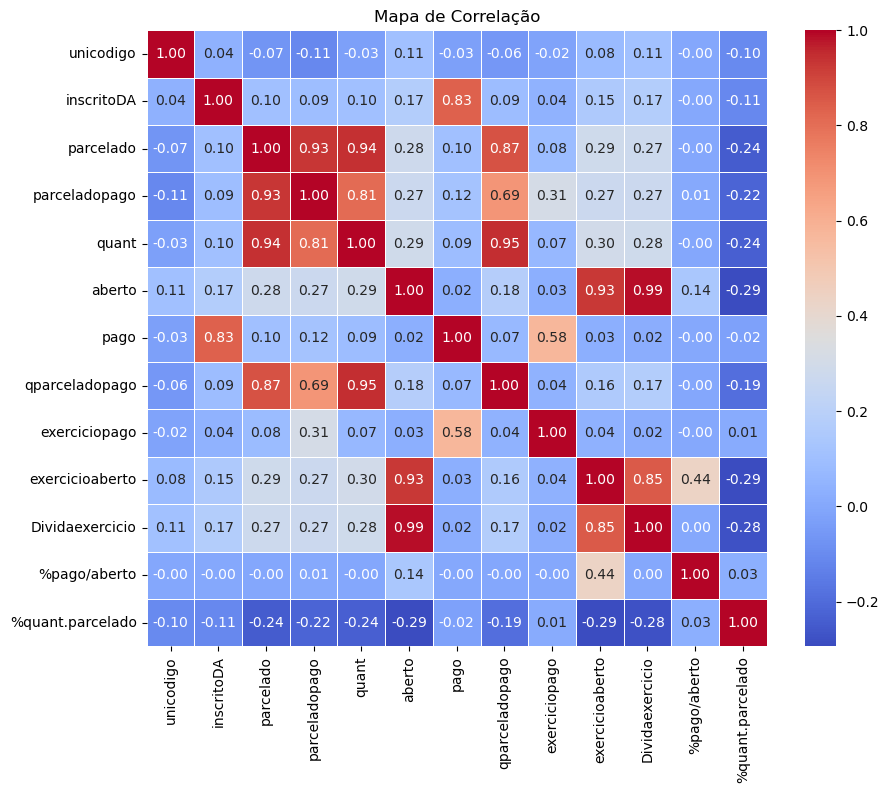

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlação")
plt.show()

Analise do dashbord

Aplicação do modelo

In [18]:
dados = dados.fillna(0)

In [20]:
amostra = pd.read_excel('amostra_portifolio.xlsx')

,unicodigo,resposta
0,183807.0,R
1,127254.0,B
2,54946.0,M
3,79869.0,M
4,10150.0,B
...,...,...
195,99986.0,R
196,88085.0,B
197,152577.0,R
198,144385.0,M


In [21]:
amostra['resposta'] = amostra['resposta'].replace('R', 1)
amostra['resposta'] = amostra['resposta'].replace('M', 2)
amostra['resposta'] = amostra['resposta'].replace('B', 3)
amostra

,unicodigo,resposta
0,183807.0,1
1,127254.0,3
2,54946.0,2
3,79869.0,2
4,10150.0,3
...,...,...
195,99986.0,1
196,88085.0,3
197,152577.0,1
198,144385.0,2


In [32]:
train = pd.merge(amostra, dados, on='unicodigo', how='inner')
train = train.drop('Situação', axis = 1)
train

,unicodigo,resposta,inscritoDA,parcelado,parceladopago,quant,aberto,pago,qparceladopago,exerciciopago,exercicioaberto,Dividaexercicio,%pago/aberto,%quant.parcelado
0,183807.0,1,1317.9806,0.00,0.00,0.0,0.00,0.0000,0.0,0.0000,0.00,0.00,0.000000,0.0
1,127254.0,3,132.2100,0.00,0.00,0.0,761.75,26531.1500,0.0,26531.1500,629.54,132.21,2.871153,0.0
2,54946.0,2,24631.0925,11575.39,60519.65,11.0,5979.49,88687.3803,0.0,58044.8234,5407.96,571.53,6.742211,0.0
3,79869.0,2,947.9200,0.00,0.00,0.0,1217.86,6982.7800,0.0,6982.7800,269.94,947.92,17.440905,0.0
4,10150.0,3,50.5400,0.00,0.00,0.0,341.39,23879.4965,0.0,23879.4965,290.85,50.54,1.429637,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,99986.0,1,555.6000,417.80,417.80,1.0,748.17,337.5900,0.0,198.3100,0.00,0.00,221.620901,0.0
195,88085.0,3,1346.0400,0.00,0.00,0.0,2403.44,1368.5200,0.0,1368.5200,1057.40,1346.04,175.623301,0.0
196,152577.0,1,1628.0600,0.00,0.00,0.0,1777.35,508.6300,0.0,508.5100,151.24,1626.11,349.438688,0.0
197,144385.0,2,6528.0500,4080.16,41581.49,5.0,3553.37,3236.0200,0.0,832.5400,340.70,3212.67,109.806800,0.0


In [33]:
x = treino.iloc[:, 2:13].values
y = treino['resposta'].values

In [81]:
df_temp = pd.DataFrame(train,columns=train.columns[2:13])
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste=train_test_split(df_temp,train['resposta'],test_size=0.5,stratify=train['resposta'])
x_validacao,x_teste,y_validacao,y_teste=train_test_split(x_teste,y_teste,test_size=0.5, stratify = y_teste)

KNN

In [56]:
for i in range(1,51):
  for j in ["uniform","distance"]:
    KNN = KNeighborsClassifier(n_neighbors=i,weights=j)
    KNN.fit(x_treino,y_treino)
    opiniao = KNN.predict(x_validacao)
    pred = KNN.predict(x_validacao)
    print("Acc: ",accuracy_score(y_validacao, opiniao), 'n vizinhos: ', i, 'distancia: ', j)

Acc:  0.48 n vizinhos:  1 distancia:  uniform
Acc:  0.48 n vizinhos:  1 distancia:  distance
Acc:  0.4 n vizinhos:  2 distancia:  uniform
Acc:  0.48 n vizinhos:  2 distancia:  distance
Acc:  0.4 n vizinhos:  3 distancia:  uniform
Acc:  0.4 n vizinhos:  3 distancia:  distance
Acc:  0.42 n vizinhos:  4 distancia:  uniform
Acc:  0.46 n vizinhos:  4 distancia:  distance
Acc:  0.46 n vizinhos:  5 distancia:  uniform
Acc:  0.4 n vizinhos:  5 distancia:  distance
Acc:  0.42 n vizinhos:  6 distancia:  uniform
Acc:  0.46 n vizinhos:  6 distancia:  distance
Acc:  0.4 n vizinhos:  7 distancia:  uniform
Acc:  0.48 n vizinhos:  7 distancia:  distance
Acc:  0.42 n vizinhos:  8 distancia:  uniform
Acc:  0.48 n vizinhos:  8 distancia:  distance
Acc:  0.38 n vizinhos:  9 distancia:  uniform
Acc:  0.48 n vizinhos:  9 distancia:  distance
Acc:  0.46 n vizinhos:  10 distancia:  uniform
Acc:  0.48 n vizinhos:  10 distancia:  distance
Acc:  0.48 n vizinhos:  11 distancia:  uniform
Acc:  0.46 n vizinhos:  11

In [64]:
KNN = KNeighborsClassifier(n_neighbors=35,weights='distance')
KNN.fit(x_treino,y_treino)
opiniao = KNN.predict(x_teste)
print("Acc: ",accuracy_score(y_teste, opiniao))

Acc:  0.46


In [65]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.48      0.71      0.58        21
           2       0.00      0.00      0.00        12
           3       0.50      0.47      0.48        17

    accuracy                           0.46        50
   macro avg       0.33      0.39      0.35        50
weighted avg       0.37      0.46      0.41        50



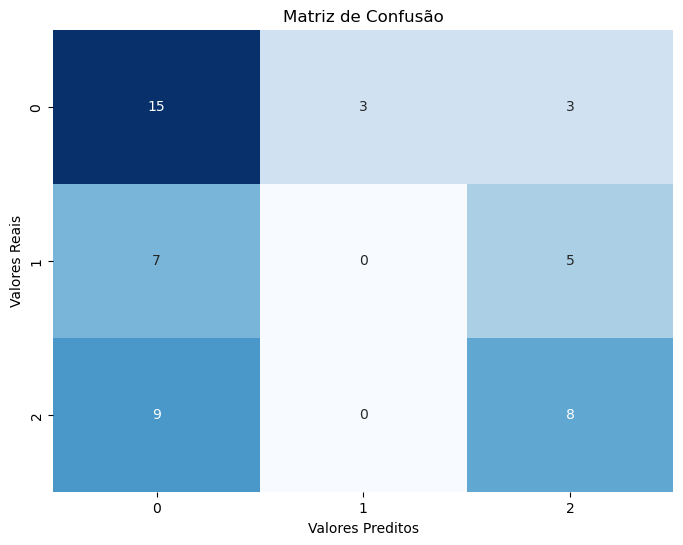

In [67]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [68]:
y_score = KNN.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC KNN: ",metrics.auc(fpr,tpr))


AUC KNN:  0.4100877192982456


NB

In [69]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_treino,y_treino)
opiniao = NB.predict(x_validacao) ## colhendo a opiniao do classificador
print("Acc: ",accuracy_score(y_validacao, opiniao))

Acc:  0.44


In [70]:
y_score = NB.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC NB: ",metrics.auc(fpr,tpr))

AUC NB:  0.5109649122807018


Arvore de decisão 

In [84]:
from sklearn import tree ## quando mais for, mais aumenta a saida, pq é combinatoria
for cri in ['gini', 'entropy']:
  for md in range(5,11):
    for nms in range(3,8):
      DT = tree.DecisionTreeClassifier(criterion=cri, max_depth=md, min_samples_split=nms) ## max_depth é a profundidade max da arvore (poda) e criteiron o criterio de avaliacao
      DT.fit(x_treino,y_treino) ## treinando o classificador
      opiniao = DT.predict(x_validacao) ## colhendo a opiniao do classificador
      print("criterion: ", cri, "Acc: ",accuracy_score(y_validacao, opiniao), 'md', md,'nms', nms) # calc a acuracia

criterion:  gini Acc:  0.44 md 5 nms 3
criterion:  gini Acc:  0.42 md 5 nms 4
criterion:  gini Acc:  0.44 md 5 nms 5
criterion:  gini Acc:  0.44 md 5 nms 6
criterion:  gini Acc:  0.5 md 5 nms 7
criterion:  gini Acc:  0.5 md 6 nms 3
criterion:  gini Acc:  0.48 md 6 nms 4
criterion:  gini Acc:  0.48 md 6 nms 5
criterion:  gini Acc:  0.48 md 6 nms 6
criterion:  gini Acc:  0.54 md 6 nms 7
criterion:  gini Acc:  0.48 md 7 nms 3
criterion:  gini Acc:  0.44 md 7 nms 4
criterion:  gini Acc:  0.48 md 7 nms 5
criterion:  gini Acc:  0.52 md 7 nms 6
criterion:  gini Acc:  0.56 md 7 nms 7
criterion:  gini Acc:  0.5 md 8 nms 3
criterion:  gini Acc:  0.42 md 8 nms 4
criterion:  gini Acc:  0.44 md 8 nms 5
criterion:  gini Acc:  0.5 md 8 nms 6
criterion:  gini Acc:  0.54 md 8 nms 7
criterion:  gini Acc:  0.46 md 9 nms 3
criterion:  gini Acc:  0.48 md 9 nms 4
criterion:  gini Acc:  0.42 md 9 nms 5
criterion:  gini Acc:  0.52 md 9 nms 6
criterion:  gini Acc:  0.54 md 9 nms 7
criterion:  gini Acc:  0.48 m

In [85]:
DT = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_split=3) ## max_depth é a profundidade max da arvore (poda) e criteiron o criterio de avaliacao
DT.fit(x_treino,y_treino) ## treinando o classificador
opiniao = DT.predict(x_teste) ## colhendo a opiniao do classificador
print("criterion: ", cri, "Acc: ",accuracy_score(y_teste, opiniao), 'md', md,'nms', nms) # calc a acuracia

criterion:  entropy Acc:  0.66 md 10 nms 7


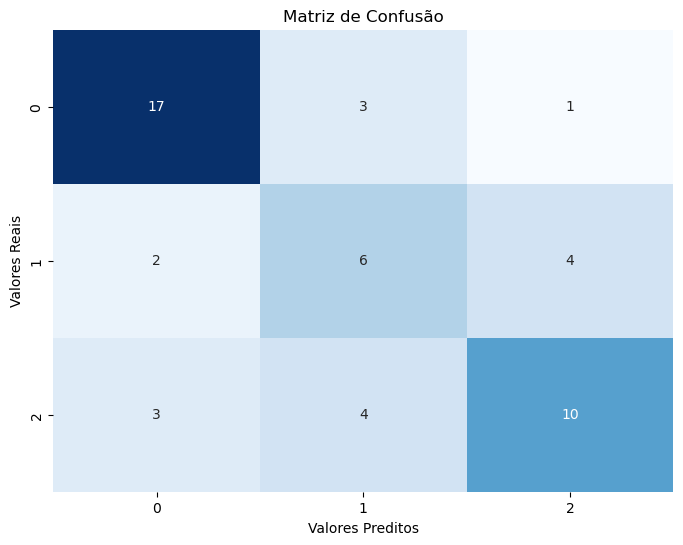

In [86]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [87]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.77      0.81      0.79        21
           2       0.46      0.50      0.48        12
           3       0.67      0.59      0.62        17

    accuracy                           0.66        50
   macro avg       0.63      0.63      0.63        50
weighted avg       0.66      0.66      0.66        50



In [88]:
DT = tree.DecisionTreeClassifier()
DT.fit(x_treino,y_treino)
y_score = DT.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC DT: ",metrics.auc(fpr,tpr))

AUC DT:  0.6162280701754386


In [89]:
feature_importances = DT.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
            Feature  Importance
7     exerciciopago    0.246752
5              pago    0.235933
0        inscritoDA    0.147294
9   Dividaexercicio    0.146423
10     %pago/aberto    0.082997
8   exercicioaberto    0.047071
2     parceladopago    0.045543
6    qparceladopago    0.024660
1         parcelado    0.023327
3             quant    0.000000
4            aberto    0.000000


In [91]:
from sklearn.tree import export_text

tree_rules = export_text(DT, feature_names=list(features))
print(tree_rules)

|--- exerciciopago <= 796.83
|   |--- inscritoDA <= 655.64
|   |   |--- pago <= 162.05
|   |   |   |--- exerciciopago <= 100.00
|   |   |   |   |--- class: 1
|   |   |   |--- exerciciopago >  100.00
|   |   |   |   |--- class: 2
|   |   |--- pago >  162.05
|   |   |   |--- %pago/aberto <= 201.21
|   |   |   |   |--- class: 3
|   |   |   |--- %pago/aberto >  201.21
|   |   |   |   |--- pago <= 202.57
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- pago >  202.57
|   |   |   |   |   |--- class: 2
|   |--- inscritoDA >  655.64
|   |   |--- exerciciopago <= 109.58
|   |   |   |--- exerciciopago <= 79.55
|   |   |   |   |--- class: 1
|   |   |   |--- exerciciopago >  79.55
|   |   |   |   |--- class: 3
|   |   |--- exerciciopago >  109.58
|   |   |   |--- class: 1
|--- exerciciopago >  796.83
|   |--- Dividaexercicio <= 2013.17
|   |   |--- pago <= 2465.27
|   |   |   |--- class: 2
|   |   |--- pago >  2465.27
|   |   |   |--- inscritoDA <= 5909.92
|   |   |   |   |--- exercicioabert

Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier
for cri in ['gini', 'entropy']:
  for md in range(5,11):
    for nms in range(3,8):
      for ne in (50, 100, 150, 200):
        RF = RandomForestClassifier(criterion = cri, n_estimators=ne, max_depth=md,min_samples_split=nms)
        RF.fit(x_treino,y_treino)
        opiniao = RF.predict(x_validacao)
        print("criterion: ", cri, "Acc: ",accuracy_score(y_validacao, opiniao), 'md', md,'nms', nms, 'ne', ne) # calc a acuracia
        # plot_roc_curve(fpr, tpr,"yellow","RF")

criterion:  gini Acc:  0.58 md 5 nms 3 ne 50
criterion:  gini Acc:  0.54 md 5 nms 3 ne 100
criterion:  gini Acc:  0.58 md 5 nms 3 ne 150
criterion:  gini Acc:  0.56 md 5 nms 3 ne 200
criterion:  gini Acc:  0.58 md 5 nms 4 ne 50
criterion:  gini Acc:  0.52 md 5 nms 4 ne 100
criterion:  gini Acc:  0.58 md 5 nms 4 ne 150
criterion:  gini Acc:  0.58 md 5 nms 4 ne 200
criterion:  gini Acc:  0.56 md 5 nms 5 ne 50
criterion:  gini Acc:  0.54 md 5 nms 5 ne 100
criterion:  gini Acc:  0.56 md 5 nms 5 ne 150
criterion:  gini Acc:  0.6 md 5 nms 5 ne 200
criterion:  gini Acc:  0.6 md 5 nms 6 ne 50
criterion:  gini Acc:  0.58 md 5 nms 6 ne 100
criterion:  gini Acc:  0.56 md 5 nms 6 ne 150
criterion:  gini Acc:  0.56 md 5 nms 6 ne 200
criterion:  gini Acc:  0.52 md 5 nms 7 ne 50
criterion:  gini Acc:  0.6 md 5 nms 7 ne 100
criterion:  gini Acc:  0.56 md 5 nms 7 ne 150
criterion:  gini Acc:  0.58 md 5 nms 7 ne 200
criterion:  gini Acc:  0.56 md 6 nms 3 ne 50
criterion:  gini Acc:  0.58 md 6 nms 3 ne 1

criterion:  entropy Acc:  0.58 md 7 nms 7 ne 150
criterion:  entropy Acc:  0.6 md 7 nms 7 ne 200
criterion:  entropy Acc:  0.5 md 8 nms 3 ne 50
criterion:  entropy Acc:  0.6 md 8 nms 3 ne 100
criterion:  entropy Acc:  0.54 md 8 nms 3 ne 150
criterion:  entropy Acc:  0.58 md 8 nms 3 ne 200
criterion:  entropy Acc:  0.54 md 8 nms 4 ne 50
criterion:  entropy Acc:  0.54 md 8 nms 4 ne 100
criterion:  entropy Acc:  0.56 md 8 nms 4 ne 150
criterion:  entropy Acc:  0.58 md 8 nms 4 ne 200
criterion:  entropy Acc:  0.56 md 8 nms 5 ne 50
criterion:  entropy Acc:  0.6 md 8 nms 5 ne 100
criterion:  entropy Acc:  0.54 md 8 nms 5 ne 150
criterion:  entropy Acc:  0.56 md 8 nms 5 ne 200
criterion:  entropy Acc:  0.64 md 8 nms 6 ne 50
criterion:  entropy Acc:  0.56 md 8 nms 6 ne 100
criterion:  entropy Acc:  0.6 md 8 nms 6 ne 150
criterion:  entropy Acc:  0.56 md 8 nms 6 ne 200
criterion:  entropy Acc:  0.62 md 8 nms 7 ne 50
criterion:  entropy Acc:  0.56 md 8 nms 7 ne 100
criterion:  entropy Acc:  0.52

In [94]:
inicio = time.time()
RF = RandomForestClassifier(criterion = 'gini', n_estimators=200, max_depth=10,min_samples_split=6)
RF.fit(x_treino,y_treino)
opiniao = RF.predict(x_teste)
print("criterion: ", cri, "Acc: ",accuracy_score(y_teste, opiniao)) # calc a acuracia

fim = time.time()
print(fim - inicio)

criterion:  entropy Acc:  0.7
0.2237551212310791


In [95]:
print(classification_report(y_teste,opiniao))

              precision    recall  f1-score   support

           1       0.78      0.86      0.82        21
           2       0.55      0.50      0.52        12
           3       0.69      0.65      0.67        17

    accuracy                           0.70        50
   macro avg       0.67      0.67      0.67        50
weighted avg       0.69      0.70      0.70        50



In [ ]:
y_score = RF.predict_proba(x_teste)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_teste,y_score,pos_label=2)
print("AUC RF: ",metrics.auc(fpr,tpr))

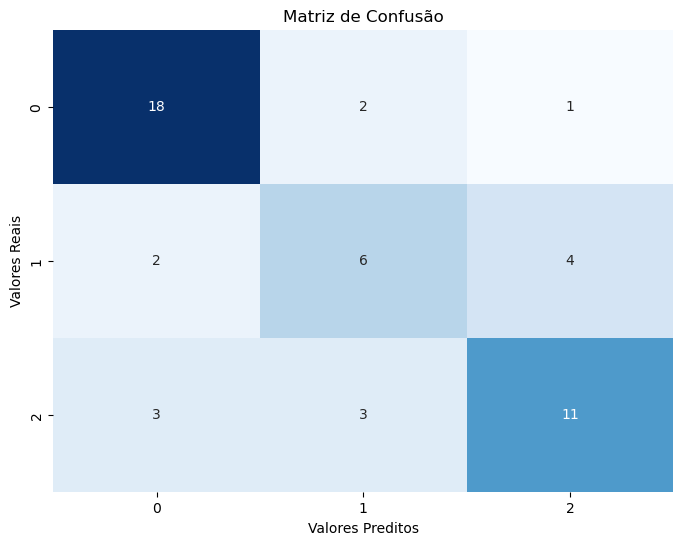

In [96]:
cm = confusion_matrix(y_teste, opiniao)

# Plotar o heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Valores Preditos")
plt.ylabel("Valores Reais")
plt.title("Matriz de Confusão")
plt.show()

In [97]:
# Importância das Features
feature_importances = RF.feature_importances_
features = x_treino.columns if isinstance(x_treino, pd.DataFrame) else range(len(feature_importances))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by="Importance", ascending=False)

print("Importância das Features:")
print(importances_df)

Importância das Features:
            Feature  Importance
7     exerciciopago    0.193029
5              pago    0.150470
9   Dividaexercicio    0.126160
10     %pago/aberto    0.125750
0        inscritoDA    0.097467
4            aberto    0.090855
8   exercicioaberto    0.069344
1         parcelado    0.053430
3             quant    0.040208
2     parceladopago    0.037597
6    qparceladopago    0.015688


Avaliação do melhor metodo

acuracia

In [1]:
KNN = [0.72,0.68,0.62,0.72,0.72,0.72,0.66,0.74,0.66,0.6]
RF = [0.74,0.74,0.56,0.7,0.72,0.68,0.66,0.76,0.76,0.7]
AD = [0.64,0.74,0.54,0.7,0.62,0.54,0.62,0.48,0.64,0.8]

from scipy import stats
print(stats.kruskal(KNN, RF, AD))

KruskalResult(statistic=4.431804899977527, pvalue=0.10905505309557256)


AUC

In [2]:
KNN = [0.81,0.67,0.69,0.61,0.73,0.73,0.71,0.76,0.67,0.67]
RF = [0.85,0.75,0.64,0.76,0.62,0.61,0.75,0.65,0.77,0.69]
AD = [0.52,0.52,0.6,0.59,0.71,0.57,0.52,0.58,0.62,0.66]

from scipy import stats
print(stats.kruskal(KNN, RF, AD))

KruskalResult(statistic=13.057767857142858, pvalue=0.0014606351135481711)


In [3]:
from scipy.stats import mannwhitneyu
p = mannwhitneyu(KNN, RF, method="exact",alternative="two-sided")
print("KNN vs RF: ",p)
p = mannwhitneyu(KNN, AD, method="exact",alternative="two-sided")
print("KNN vs AD: ",p)
p = mannwhitneyu(AD, RF, method="exact",alternative="two-sided")
print("AD vs RF: ",p)

KNN vs RF:  MannwhitneyuResult(statistic=48.5, pvalue=0.9705124596765464)
KNN vs AD:  MannwhitneyuResult(statistic=92.5, pvalue=0.0007252809110394249)
AD vs RF:  MannwhitneyuResult(statistic=10.5, pvalue=0.0020892420273225226)


Aplicando o modelo

In [4]:
dados

NameError: name 'dados' is not defined

visualição - interpretação

Conclusão